# Data Science Challenge: Titanic

In [2]:
# import base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read training data
train_data = pd.read_csv('Data/train.csv')

# read test data
test_data = pd.read_csv('Data/test.csv')

In [4]:
print('Shape of train data: ', train_data.shape)
train_data.head()

Shape of train data:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Shape of test data: ', test_data.shape)
test_data.head()

Shape of test data:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visualize the Data

In [170]:
def plot_survivalRateByCategory(data,colname):
    # get mean and std dev for survival rates per category
    survivalByCategory = train_data.groupby([colname])['Survived'].describe()
    # number of differen categories
    n_category = survivalByCategory.shape[0]
    # plot one std dev confidence (confidence is capped between 0 and 1)
    for i in range(n_category):
        plt.plot([i,i],
                 np.minimum(np.maximum(survivalByCategory['mean'][i]+np.array([-1,1])*survivalByCategory['std'][i],0),1),
                'b');
    # plot survival rate
    plt.plot(range(n_category),survivalByCategory['mean'],'bo', markersize=12);
    plt.xticks(np.array([-0.4]+ list(range(n_category)) + [n_category-1+.4]), 
               ['']+list(survivalByCategory.index)+['']);
    plt.yticks(np.arange(0,1.1,0.2),['']+[str(np.int8(s))+'%' for s in np.arange(.2,1.1,0.2)*100]);
    plt.title('Survival Rate By {0}'.format(colname), size=16);
    plt.show()

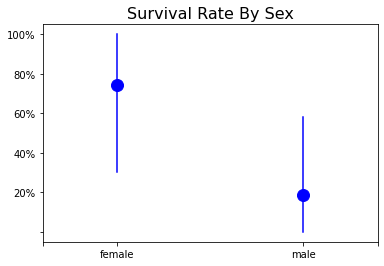

In [171]:
plot_survivalRateByCategory(train_data,'Sex')

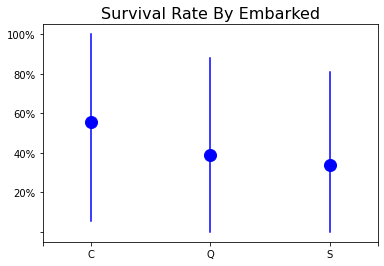

In [172]:
plot_survivalRateByCategory(train_data,'Embarked')

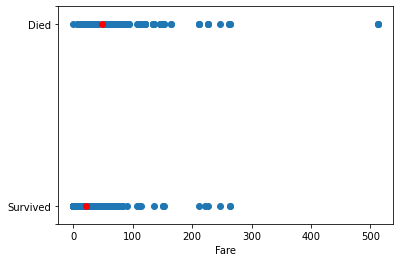

In [174]:
plt.scatter(train_data['Fare'],train_data['Survived']);
plt.scatter(train_data.groupby(['Survived'])['Fare'].mean(),[0,1],c='red')
plt.yticks([-.1,0,1,1.1],['','Survived','Died','']);
plt.xlabel('Fare');

In [131]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [118]:
# what happens with people that didn'
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## Data Preprocessing

### a) Remove uninformative Rows or Columns

### b) NaN Handling

### c) Outlier Handling

## Model Training